# Megadescriptor in Pytorch Lightning

In [1]:
import sys
sys.path.append('..')
import argparse
import shutil
import os
import yaml
import timm
import torch
import torch.nn as nn
from pytorch_lightning import LightningModule
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_lightning import Trainer
import numpy as np
from PIL import Image
import wandb
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

In [2]:
from wildlife_datasets import analysis, datasets, loader
from data.raptors_wildlife import Raptors, WildlifeReidDataModule
from data.wildlife_dataset import Wildlife, WildlifeDataModule
from models.megadescriptor import MegaDescriptor

root = '/Users/amee/Documents/code/master-thesis/datasets/ATRW'

model = MegaDescriptor(backbone_model_name='hf-hub:BVRA/MegaDescriptor-T-224', 
                       embedding_size=768, 
                       lr=0.001, 
                       scale=50,
                       margin=0.5,
                       preprocess_lvl=0, 
                       re_ranking=False, 
                       outdir="results")

dataset = datasets.ATRW(root)
data = WildlifeDataModule(data_dir=root, 
                              metadata=dataset.df, 
                              cache_path='/Users/amee/Documents/code/master-thesis/EagleID/dataset/dataframe/cache_ATRW.csv', 
                              size = 224, 
                              preprocess_lvl=0, 
                              only_cache=False, 
                              batch_size=4,
                              classic_transform=True)



trainer = Trainer(accelerator="cpu")
trainer.validate(model, dataloaders=data.val_dataloader())

# #  Load dataset metadata
# import torchvision.transforms as T
# from wildlife_tools.data import WildlifeDataset
# from torch.utils.data import DataLoader


# metadata = datasets.ATRW(root)
# transform = T.Compose([T.Resize([224, 224]), T.ToTensor(), T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))])
# dataset_database_P = WildlifeDataset(metadata.df.iloc[100:,:], metadata.root, transform=transform, col_label='identity')
# dataset_query_P = WildlifeDataset(metadata.df.iloc[:100,:], metadata.root, transform=transform, col_label='identity')
# query_loader = DataLoader(
#         dataset_query_P,
#         batch_size=4,
#         num_workers=1,
#         shuffle=False,
#     )
# gallery_loader = DataLoader(
#         dataset_database_P,
#         batch_size=4,
#         num_workers=1,
#         shuffle=False,
#     )


# trainer = Trainer(accelerator="cpu")
# trainer.validate(model, dataloaders=[query_loader, gallery_loader])

/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Dataset size before pre-processing and cleaning: 5415
Split: closed-set
Samples: train/test/unassigned/total = 4340/1075/0/5415
Classes: train/test/unassigned/total = 182/182/0/182
Classes: train only/test only/joint  = 0/0/182

Fraction of train set     = 80.15%
Fraction of test set only = 0.00%
Training Set
Length: 4340
Number of individuals (classes): 182
Mean images/individual: 23.846153846153847
Min images/individual: 8
Max images/individual: 200
Test Set
Length: 1075
Number of individuals (classes): 182
Mean images per individual: 5.906593406593407
Min images per individual: 2
Max images per individual: 50


/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


Validation: |          | 0/? [00:00<?, ?it/s]

182
893


/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/wildlife_tools/similarity/cosine.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a, b = torch.tensor(a), torch.tensor(b)
/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/triplet_loss_utils.py:138: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results = pd.DataFrame(results).T.fillna(method="ffill").T


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃       DataLoader 1        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       val/accuracy        │    0.8626373410224915     │    0.8626373410224915     │
│          val/f1           │    0.8406593203544617     │    0.8406593203544617     │
│       val/precision       │    0.9175823926925659     │    0.9175823926925659     │
│        val/recall         │    0.8626373410224915     │    0.8626373410224915     │
└───────────────────────────┴───────────────────────────┴───────────────────────────┘

[{'val/accuracy': 0.8626373410224915,
  'val/precision': 0.9175823926925659,
  'val/recall': 0.8626373410224915,
  'val/f1': 0.8406593203544617},
 {'val/accuracy': 0.8626373410224915,
  'val/precision': 0.9175823926925659,
  'val/recall': 0.8626373410224915,
  'val/f1': 0.8406593203544617}]

In [3]:
# Check if query and gallery labels share identities
print("Unique query labels:", np.unique(dataset_query_P.labels))
print("Unique gallery labels:", np.unique(dataset_database_P.labels))
# Verify label alignment
metadata.df.iloc[:100,:].head()


Unique query labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]
Unique gallery labels: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 1

image_id  identity                               path  \
0  000408498f926bc6        16  atrw_detection_test/test/2639.jpg   
1  0004d0b59e19461f        34   atrw_reid_train/train/001970.jpg   
2  000871c1fc726f0b       177   atrw_reid_train/train/004612.jpg   
3  0031e80738c8832c        18  atrw_detection_test/test/1645.jpg   
4  00411460f7c92d21       112     atrw_reid_test/test/000363.jpg   

                   bbox                                          keypoints  \
0  [654, 285, 743, 406]                                                NaN   
1                   NaN  [326, 77, 2, 283, 86, 2, 331, 141, 2, 210, 174...   
2                   NaN  [127, 57, 2, 144, 82, 2, 93, 149, 2, 264, 183,...   
3  [497, 292, 788, 493]                                                NaN   
4                   NaN  [0, 0, 0, 537, 28, 2, 562, 77, 2, 437, 135, 2,...   

  original_split  
0           test  
1          train  
2          train  
3           test  
4           test

In [ ]:
from wildlife_tools.features import DeepFeatures


dataset_database_P = WildlifeDataset(metadata.df.iloc[100:,:], metadata.root, transform=transform)
dataset_query_P = WildlifeDataset(metadata.df.iloc[:100,:], metadata.root, transform=transform)

# name = 'hf-hub:BVRA/MegaDescriptor-T-224'
extractor_P = DeepFeatures('hf-hub:BVRA/MegaDescriptor-T-224' , device = 'cpu')

query_P, database_P = extractor_P(dataset_query_P), extractor_P(dataset_database_P)

from utils.triplet_loss_utils import KnnClassifier
from wildlife_tools.similarity import CosineSimilarity

similarity_function = CosineSimilarity()
similarity_P = similarity_function(query_P, database_P)
print(similarity_P)

classifier_P = KnnClassifier(k=1, database_labels=dataset_database_P.labels_string)
predictions_P = classifier_P(similarity_P['cosine'])
print("Predictions for 100 test Images:-\n",predictions_P)

accuracy_P = np.mean(dataset_query_P.labels_string == predictions_P)
print("Accuracy on ATRW data: {:.2f}%".format(accuracy_P * 100))

In [ ]:
from utils.triplet_loss_utils import get_all_embeddings
from pytorch_metric_learning.utils.inference import InferenceModel
from wildlife_tools.similarity.cosine import CosineSimilarity

query_loader, gallery_loader = data.val_dataloader()

# Initialize the feature extractor
extractor = InferenceModel(trunk=model.backbone)# Extract features from query and database
query_embeddings = get_all_embeddings(extractor, query_loader)
gallery_embeddings = get_all_embeddings(extractor, gallery_loader)

similarity_function = CosineSimilarity()
similarity = similarity_function(query_embeddings, gallery_embeddings)['cosine']
print("Similarity matrix: \n", similarity.shape)

Similarity matrix: 
 (182, 893)


/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/wildlife_tools/similarity/cosine.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a, b = torch.tensor(a), torch.tensor(b)


In [6]:
# let's try this
from utils.triplet_loss_utils import KnnClassifier

query_loader, gallery_loader = data.val_dataloader()
gallery_dataset = gallery_loader.dataset
query_dataset = query_loader.dataset

# Nearest neigbour classifier using the similarity
classifier = KnnClassifier(k=1, database_labels=gallery_dataset.labels)
preds = classifier(similarity)
preds = gallery_dataset.labels_map[preds]
print("Predictions \t", preds)
print("Ground truths \t", query_dataset.labels_string)

accuracy = np.mean(query_dataset.labels_string == preds)

print(f"Accuracy: {accuracy * 100:.4f}%")

182
893
Predictions 	 [  0   0   3   4   6   7   9  10  12  13  16  15  18  19  21  22  31  25
  27  28  30  31  33  34  36  37  39  40  42  31  45  46  48  49  51  52
  54  55  57  60  76  73  64  66  67  66  61  72  73  75  76  60  79  81
  31  60  79  87  88  33  91 105  94  96  97  99 100 102 103 105 106 108
 109 111 112 114 115 117 109 120 121 123 124 126 127 129 130 133 133 135
 136 135 138 141 142 144 145 147 148 150 151 153 154 156 157 159 160 162
 163 165 166 168 169 171 172 174 175 177 178 180 181 183 184 189 187 192
 184 192 184 195 196 198 199 201 196 204 196 192 220 210 202 213 214 216
 217 219 220 222 223 225 226 228 229 231 232 234 235 237 238 240 243 235
 246 247 249 250 270 253 255 256 258 259 261 262 264 265 267 268 270 271
 273 256]
Ground truths 	 ['0' '1' '3' '4' '6' '7' '9' '10' '12' '13' '15' '16' '18' '19' '21' '22'
 '24' '25' '27' '28' '30' '31' '33' '34' '36' '37' '39' '40' '42' '43'
 '45' '46' '48' '49' '51' '52' '54' '55' '57' '60' '61' '63' '64' '66'
 '67' 

/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/triplet_loss_utils.py:138: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results = pd.DataFrame(results).T.fillna(method="ffill").T


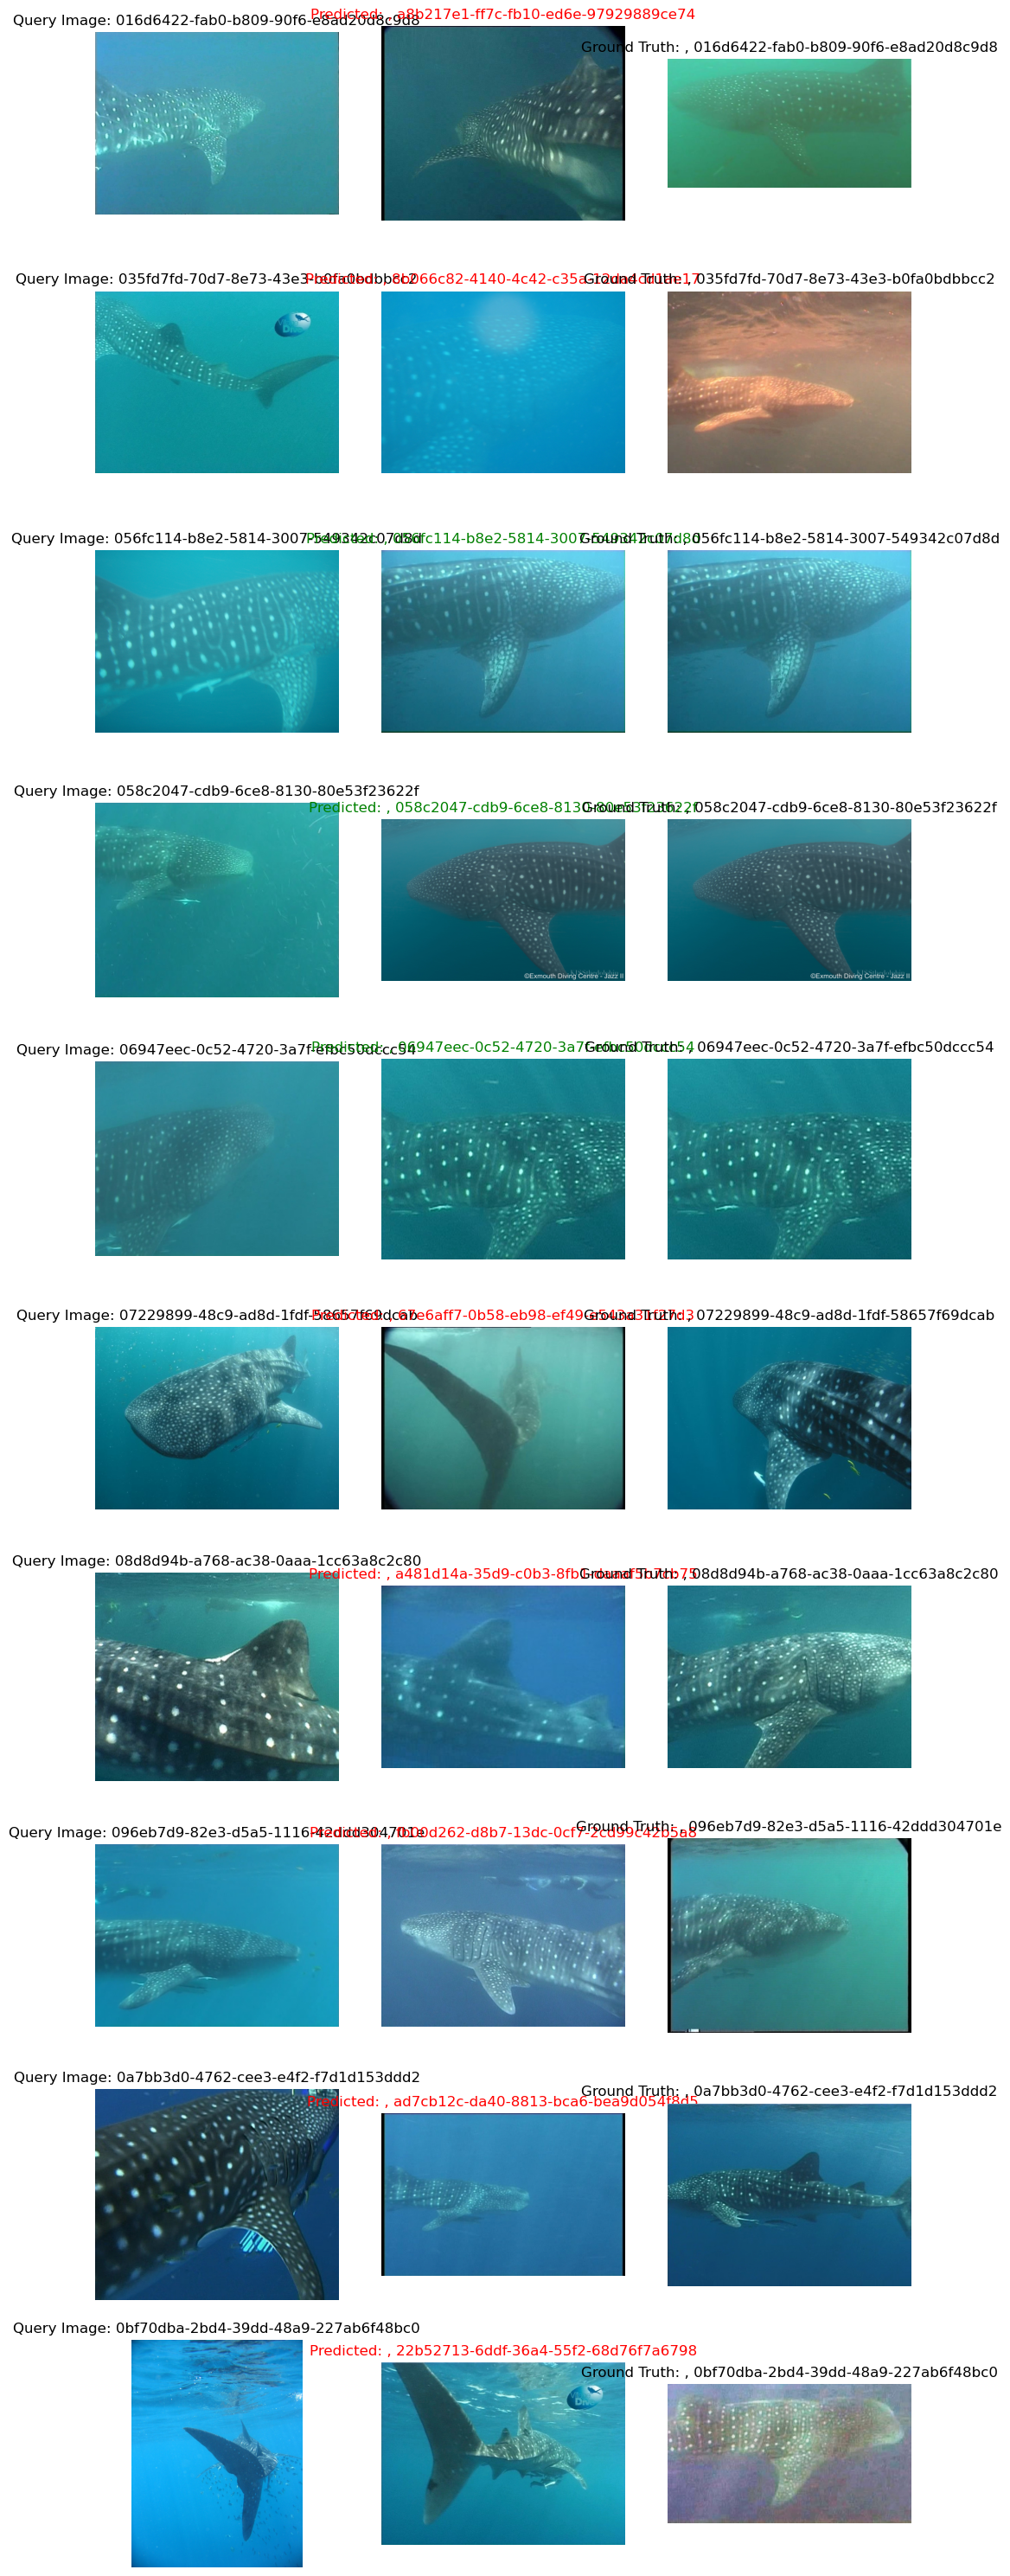

In [8]:
from utils.visualization import query_prediction_results
# Get metadata dataframes
query_metadata = query_loader.dataset.metadata
gallery_metadata = gallery_loader.dataset.metadata

# Visualize first 10 queries
query_prediction_results(
    root=root, 
    query_metadata=query_metadata,
    db_metadata=gallery_metadata,
    query_start=0,  # Starting index
    predictions=preds,
    num_images=10
)

In [ ]:
# For a specific query index
query_idx = 42  # Example index
matched_gallery_idx = predictions_idx[query_idx]

# Show masked image with bbox
masked_img(
    root=root,
    df_row=gallery_metadata.iloc[matched_gallery_idx],
    normalized=(mean, std)  # If your images were normalized
)

# Show keypoints visualization
keypoints_on_img(
    root=root,
    df_row=gallery_metadata.iloc[matched_gallery_idx]
)

# Megadescriptor from wildlife-tools

In [9]:
from utils.triplet_loss_utils import KnnClassifier
from wildlife_tools.features import DeepFeatures
from wildlife_tools.similarity import CosineSimilarity

query_loader, gallery_loader = data.val_dataloader()
gallery_dataset = gallery_loader.dataset
query_dataset = query_loader.dataset

# gallery_dataset = gallery_dataset.get_df()
# query_dataset = query_dataset.get_df()

backbone = timm.create_model('hf-hub:BVRA/MegaDescriptor-T-224', num_classes=0, pretrained=True)
extractor = DeepFeatures(backbone)
query, database = extractor(query_dataset), extractor(gallery_dataset)

print(f'Query features shape: {query.shape}, Database features shape: {database.shape}')
# Cosine similarity between deep features
similarity_function = CosineSimilarity()
similarity = similarity_function(query, database)['cosine']
print("Similarity matrix: \n", similarity.shape)

### Debug: Check indices and sizes
print(f"Database labels map size: {len(gallery_dataset.labels_map)}")
print(f"Sample indices from similarity: {np.argmax(similarity, axis=1)[:10]}")

# Nearest neigbour classifier using the similarity
classifier = KnnClassifier(k=1, database_labels=gallery_dataset.labels)
print(f"size of gallery dataset labels: {len(gallery_dataset.labels)}")
preds = classifier(similarity)
preds = gallery_dataset.labels_map[preds]
print("Prediction \t", preds)
print("Ground truth \t", query_dataset.labels_string)

acc = sum(preds == query_dataset.labels_string) / len(query_dataset.labels_string)
print('\n Accuracy: ', acc)

100%|███████████████████████████████████████████████████████████████| 11/11 [01:42<00:00,  9.29s/it]

Query features shape: (277, 768), Database features shape: (1308, 768)
Similarity matrix: 
 (277, 1308)
Database labels map size: 512
Sample indices from similarity: [ 889  760    8   11   19  591  849 1290  914  189]
size of gallery dataset labels: 1308
277
1308
Prediction 	 ['a8b217e1-ff7c-fb10-ed6e-97929889ce74' '8b066c82-4140-4c42-c35a-12da4cd1ae17' '056fc114-b8e2-5814-3007-549342c07d8d' '058c2047-cdb9-6ce8-8130-80e53f23622f' '06947eec-0c52-4720-3a7f-efbc50dccc54' '67e6aff7-0b58-eb98-ef49-e543a31f27d3' 'a481d14a-35d9-c0b3-8fb1-daaaf5b7cb75' 'fb00d262-d8b7-13dc-0cf7-2cd99c42b5a8'
 'ad7cb12c-da40-8813-bca6-bea9d054f8d5' '22b52713-6ddf-36a4-55f2-68d76f7a6798' 'c556e86b-a344-396b-c0e1-8a15051ee7a4' 'ecec2054-01c7-ed9d-94c6-603a3836f2f2' '4bf26c00-3a83-a27e-c042-064ce1a02201' '176a0208-db4d-26fc-5578-f38449c27981' '588c2f7d-d7b9-c687-0399-c7e266b1e83b' 'a785af89-b8c0-5e7b-acec-c4874ec5483f'
 '744e6f04-9907-4f75-a9ee-decdd6bfc27a' '613a92d6-25df-c5a1-f1e9-e2866fae0205' 'b80f199f-2ead-a80


/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/triplet_loss_utils.py:135: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results = pd.DataFrame(results).T.fillna(method="ffill").T


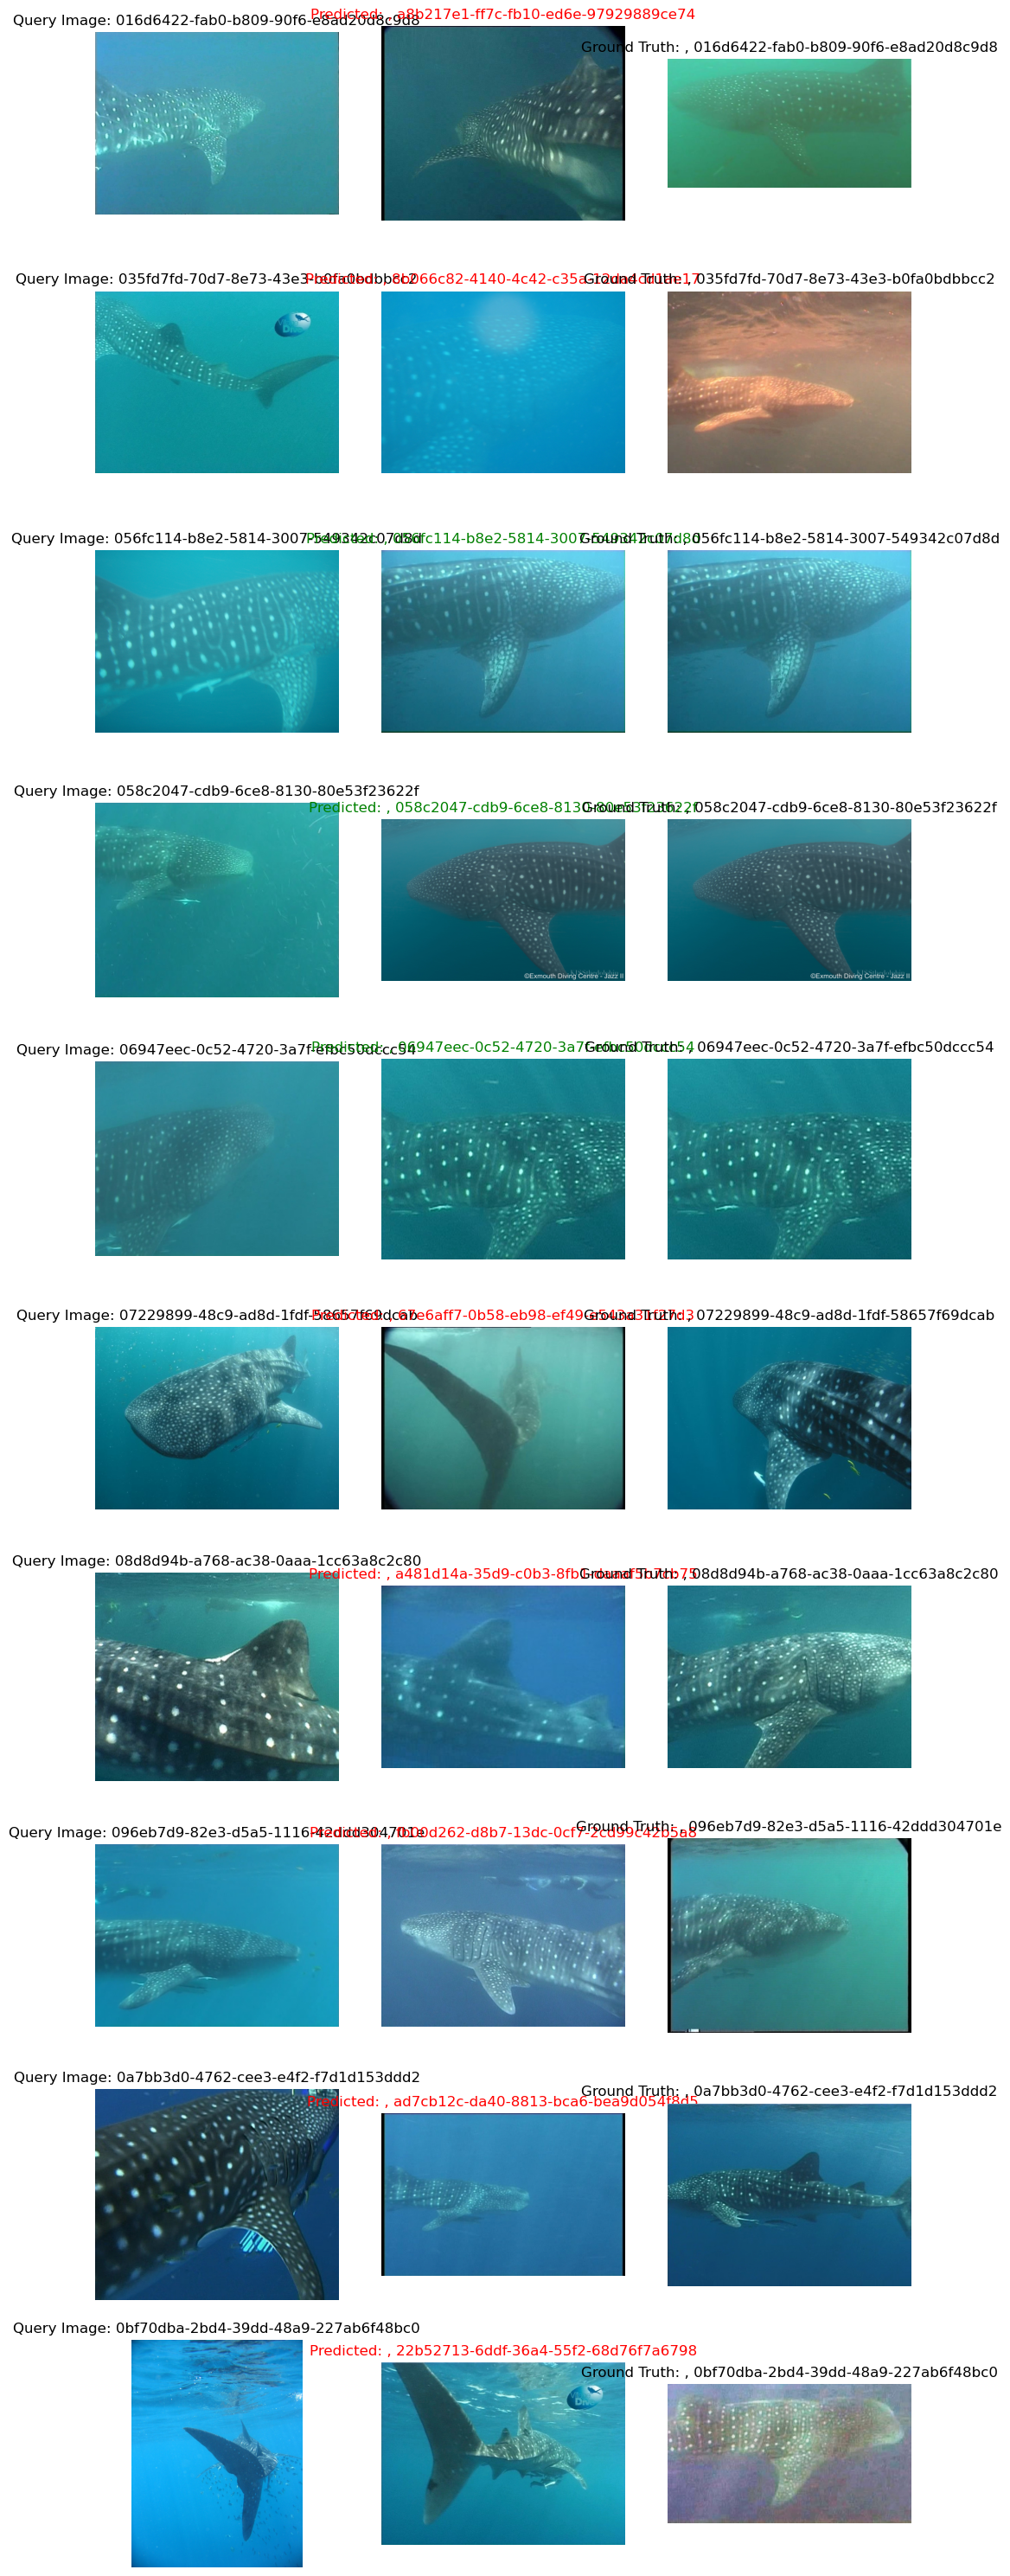

In [11]:
query_metadata = query_loader.dataset.metadata
gallery_metadata = gallery_loader.dataset.metadata

# Visualize first 10 queries
query_prediction_results(
    root=root, 
    query_metadata=query_metadata,
    db_metadata=gallery_metadata,
    query_start=0,  # Starting index
    predictions=preds,
    num_images=10)